# Blob Detection

## Class Method

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

### Method 1: Obtaining the LoG kernel and convolving it with the image

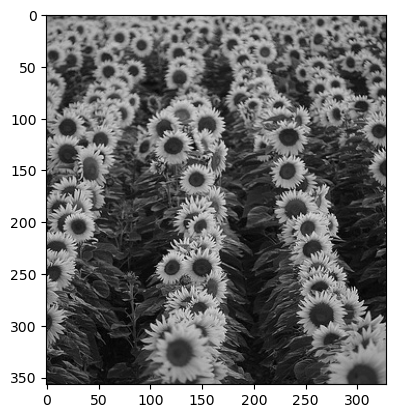

In [10]:
image = cv2.imread('data/images/sunflowers.jpg', 0)
#image = cv2.resize(image, (int(image.shape[1]/3), int(image.shape[0]/3)), interpolation=cv2.INTER_NEAREST) 
plt.imshow(image, cmap = 'gray')

In [5]:
def LoG(ksize, sigma):
    # returns sigma normalized values
    assert ksize%2 == 1     # ksize must be odd
    x, y = np.meshgrid(np.arange(-(ksize // 2), ksize // 2 + 1), np.arange(-(ksize // 2), ksize // 2 + 1))
    return 483*sigma**2 * -1/(np.pi * sigma**4) * (1 - (x**2 + y**2)/(2*sigma**2)) * np.exp(- (x**2 + y**2)/(2*sigma**2))

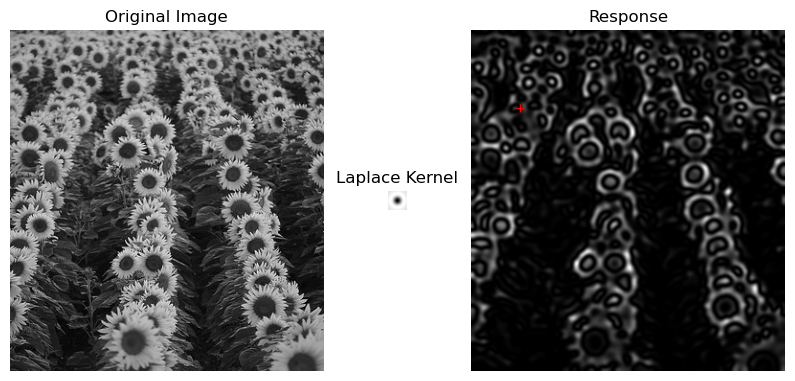

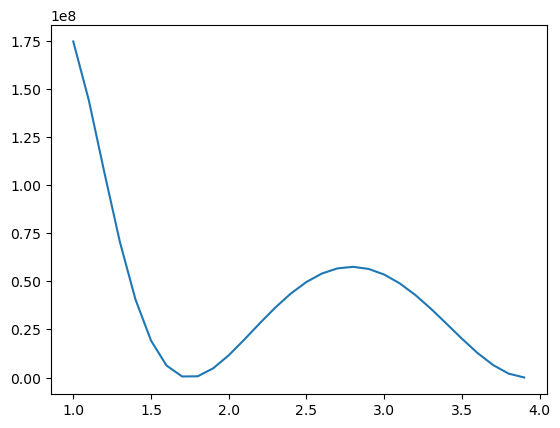

In [22]:
# Read the image
res = []
for i in np.arange(1,4,.1):
    laplace_kernel = LoG(21, i)
     
    # Apply the laplacian 
    #response = cv2.Laplacian(image, cv2.CV_32F, ksize=i, scale=i)
    response = cv2.filter2D(image, cv2.CV_32F, laplace_kernel)
    
    # Squared response
    response = response**2

    # record the response at the following pixel
    res.append((i, response[82,50]))

# Display the original image and the edges obtained with the custom kernel
%matplotlib inline
fig, ax = plt.subplots(1,3, 
                       gridspec_kw={'width_ratios': [5, 5*laplace_kernel.shape[0]/image.shape[0], 5],
                                   'wspace': .3})
fig.set_figwidth(10)
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image'), ax[0].axis('off')
ax[1].imshow(laplace_kernel, cmap='gray')
ax[1].set_title('Laplace Kernel'), ax[1].axis('off')
ax[2].imshow(response, cmap='gray')
ax[2].set_title('Response'), ax[2].axis('off') 
plt.plot(50,82,'r+')

plt.figure()
plt.plot(np.array(res)[:,0],np.array(res)[:,1])



### Method 2: Blurring with a Gaussian filter and then applying laplacian

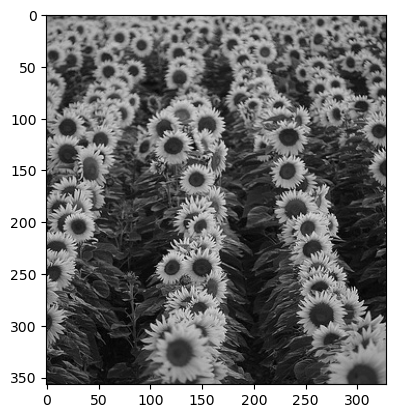

In [2]:
image = cv2.imread('data/images/sunflowers.jpg', 0)
#image = cv2.resize(image, (int(image.shape[1]/3), int(image.shape[0]/3)), interpolation=cv2.INTER_NEAREST) 
plt.imshow(image, cmap = 'gray')

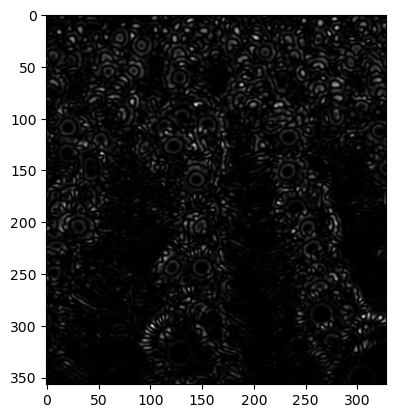

In [14]:
blurred = cv2.GaussianBlur(image,ksize=(3,3), sigmaX=2, sigmaY=2)
#laplac = cv2.Laplacian(blurred, cv2.CV_32F, ksize=1, scale=1)
lx = cv2.getDerivKernels(dx=2,dy=0,ksize=15,normalize=True)
ly = cv2.getDerivKernels(dx=0,dy=2,ksize=15,normalize=True)
laplace_kernel = np.outer(lx[1],lx[0]) + np.outer(ly[1],ly[0])

response = cv2.filter2D(image, cv2.CV_32F, laplace_kernel)
response = response**2

plt.imshow(response, cmap='gray')

## Salman's Method

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

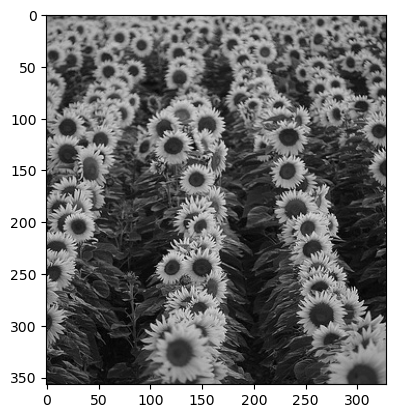

In [16]:
img = cv2.imread('data/images/sunflowers.jpg', 0)
plt.imshow(img, cmap = 'gray')

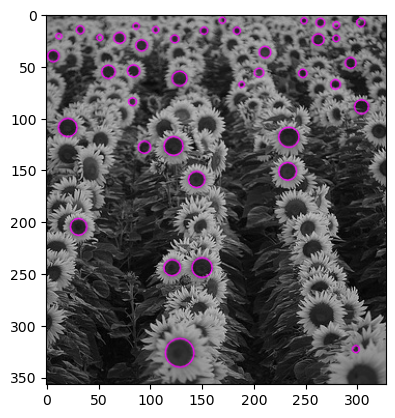

In [21]:
params = cv2.SimpleBlobDetector_Params()
params.filterByArea = True
params.minArea = 20
params.maxArea = 5000

detector = cv2.SimpleBlobDetector_create(params)

kp = detector.detect(img)

results = cv2.drawKeypoints(img, kp, None, color = (255, 0, 255), flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(results, cmap='gray')